### Import the needed package

In [1]:
import sys
sys.path.insert(0, './../')

import os
import utilities as utils
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv()

c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

True

### Global variable

In [2]:
# store the path
path_full = os.environ.get("ORI_PATH")
path_dataset_ori = os.path.join(path_full, "datasets", "splitted", "original")
path_dataset_aug = os.path.join(path_full, "datasets", "splitted", "augmented")
path_test_ori = os.path.join(path_dataset_ori, "test")
path_test_aug = os.path.join(path_dataset_aug, "test")
path_model = os.path.join(path_full, "data", "model")

### Get dataset

In [3]:
test_ori_img, test_ori_mask = utils.load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = utils.load_img_mask(path_test_aug)
testset_ori = utils.create_dataset(test_ori_img, test_ori_mask)
testset_aug = utils.create_dataset(test_aug_img, test_aug_mask)

### Test the model

In [4]:
predicted_mask_ori, model_ori = utils.predict_model(testset_ori, path_model, "unet_model_ori")
predicted_mask_aug, model_aug = utils.predict_model(testset_aug, path_model, "unet_model_aug")

1/1 [==============================] - 0s 412ms/step


### Check the treshold

(array([509794.,   1921.,   1162.,    916.,    823.,    791.,    942.,
          1193.,   1920., 167751.]),
 array([2.81423496e-11, 9.99948159e-02, 1.99989632e-01, 2.99984455e-01,
        3.99979264e-01, 4.99974072e-01, 5.99968910e-01, 6.99963689e-01,
        7.99958527e-01, 8.99953306e-01, 9.99948144e-01]),
 <BarContainer object of 10 artists>)

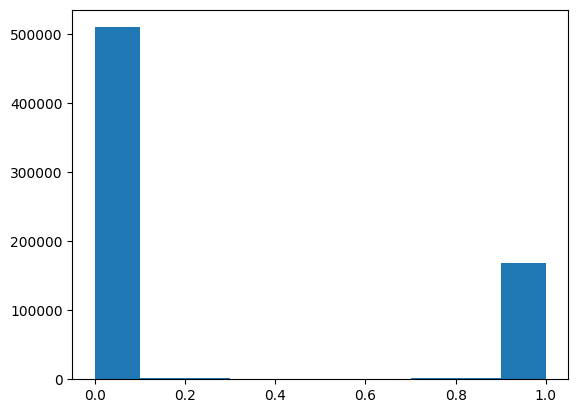

In [5]:
plt.hist(np.unique(predicted_mask_aug))

### Split the disc and cup mask

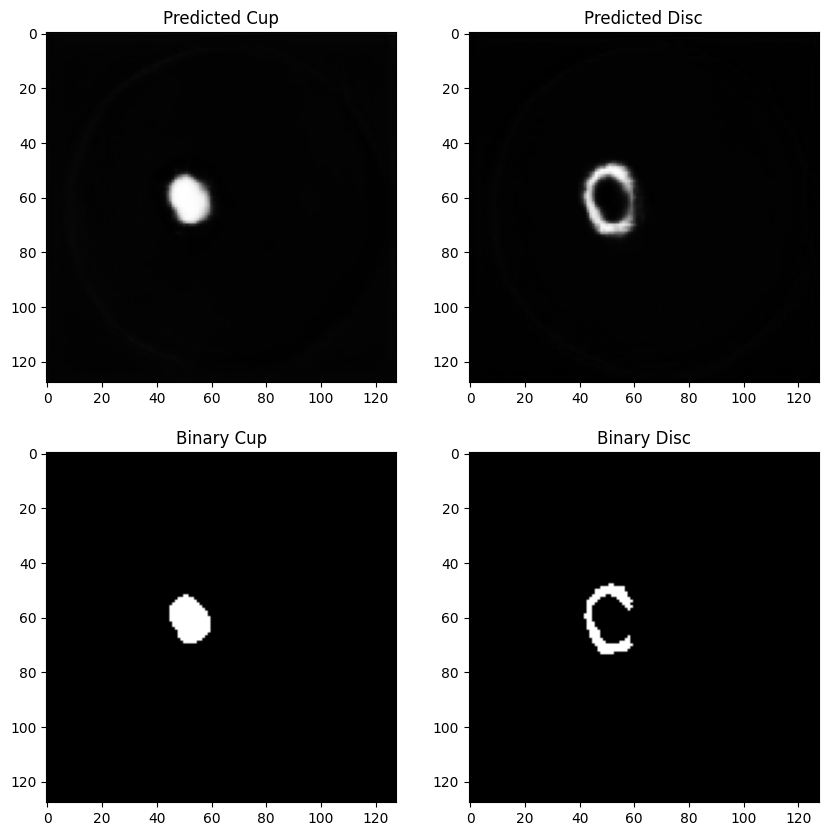

In [6]:
cup_mask_ori, disc_mask_ori, bcup_mask_ori, bdisc_mask_ori = utils.split_disc_cup_mask(predicted_mask_ori, .5)

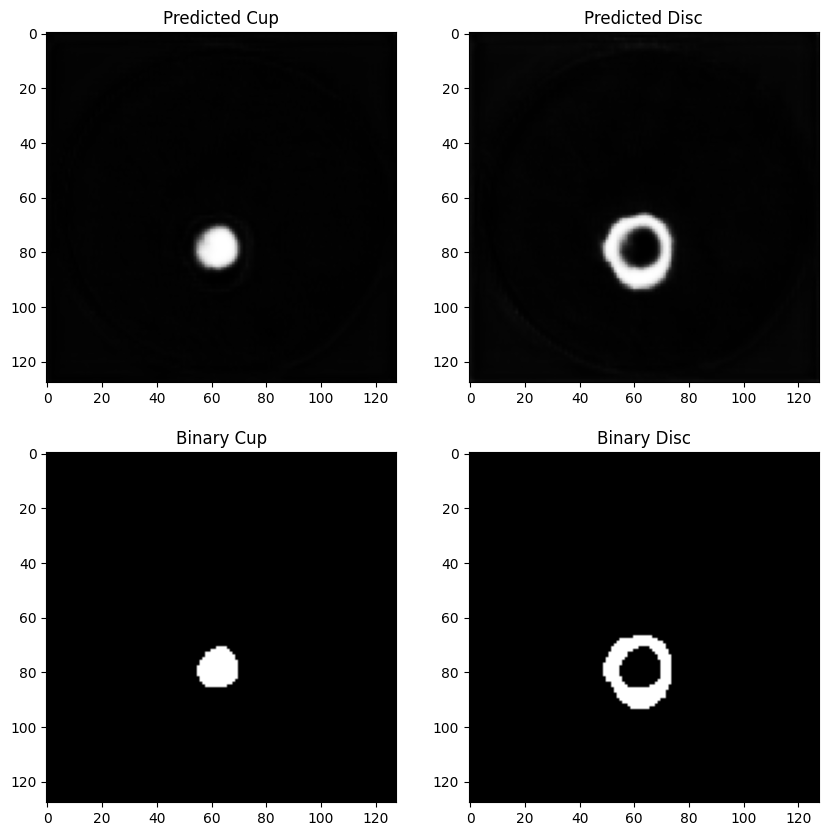

In [7]:
cup_mask_aug, disc_mask_aug, bcup_mask_aug, bdisc_mask_aug = utils.split_disc_cup_mask(predicted_mask_aug, 0.5)

### Visualize the test and predicted image

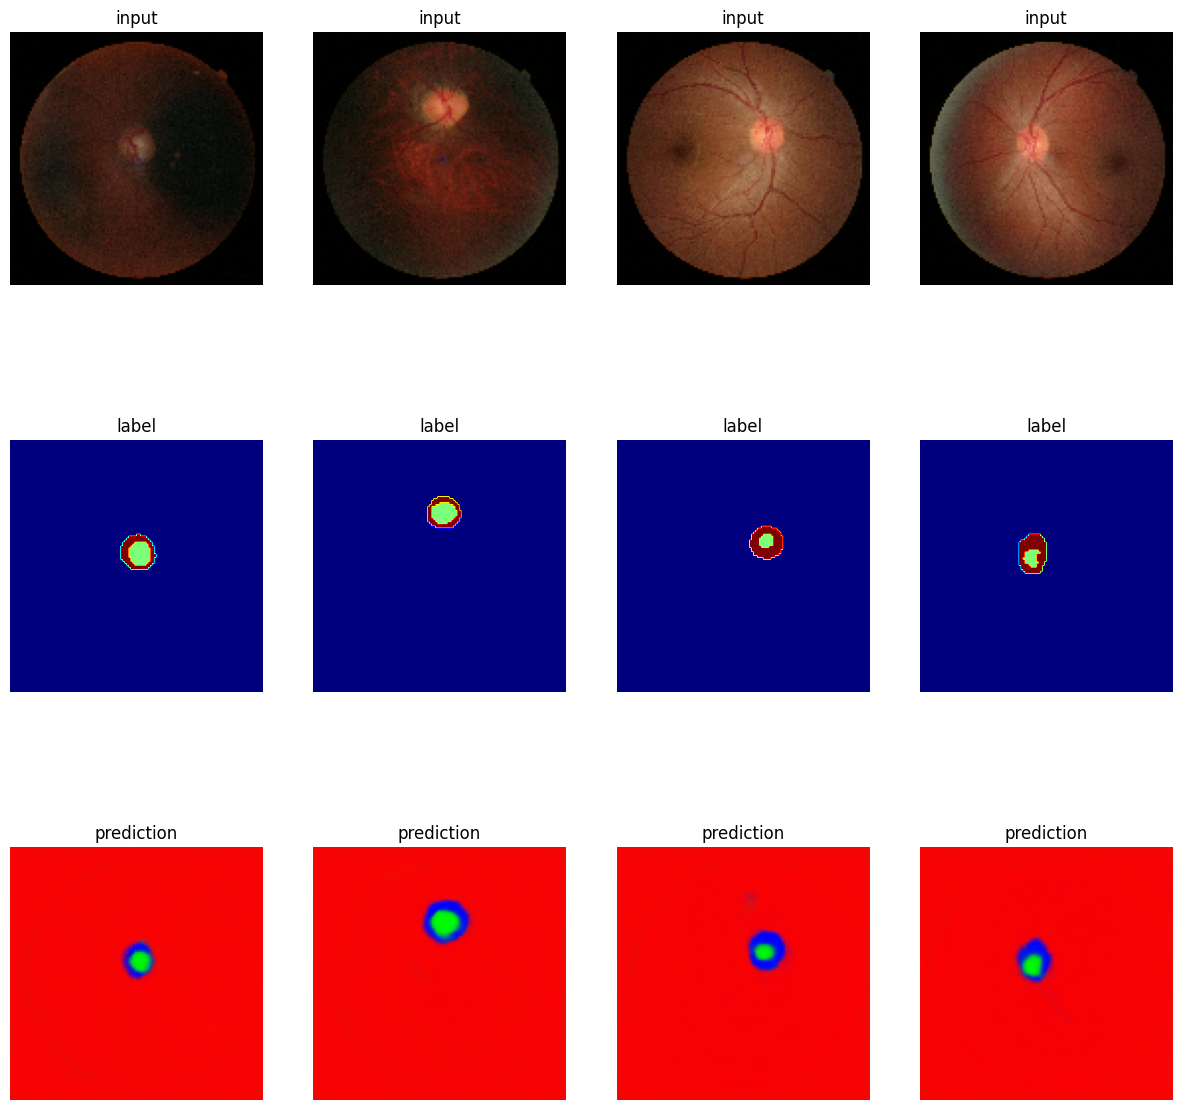

In [8]:
utils.visualize_pred_mask(testset_ori, model_ori, 4)

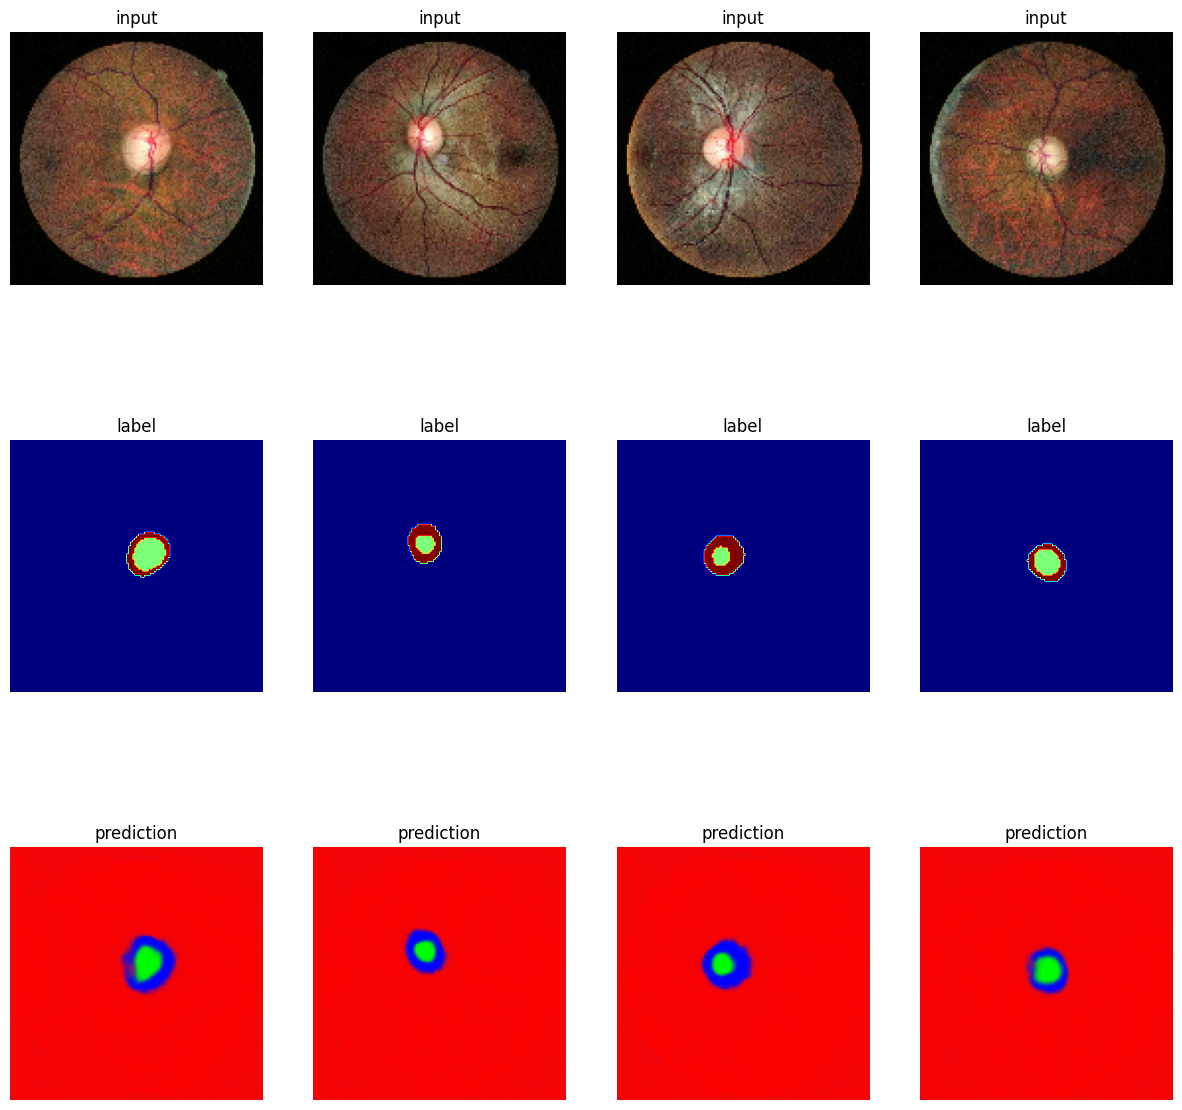

In [9]:
utils.visualize_pred_mask(testset_aug, model_aug, 4)

### Calculate the CDR value

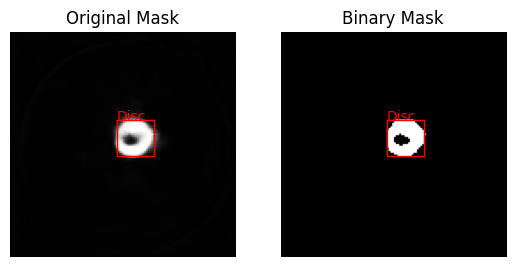

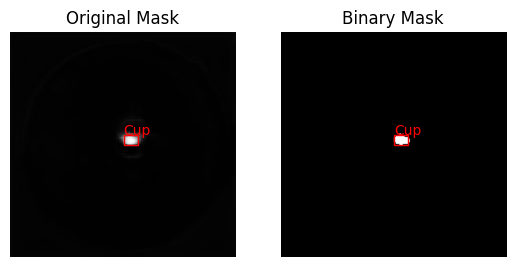

[{'cup_area': 41, 'disc_area': 321, 'acdr': 0.1277258566978193, 'h_cdr': 0.4090909090909091, 'v_cdr': 0.3333333333333333}, {'d_ymin': 50, 'd_ymax': 70, 'd_xmin': 60, 'd_xmax': 81, 'd_height': 21, 'd_width': 22, 'c_ymin': 58, 'c_ymax': 64, 'c_xmin': 64, 'c_xmax': 72, 'c_height': 7, 'c_width': 9}]


In [10]:
print(utils.calculate_area_CDR(cup_mask_ori[0], disc_mask_ori[0], bcup_mask_ori[0], bdisc_mask_ori[0]))

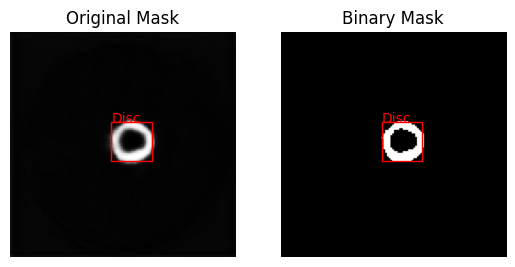

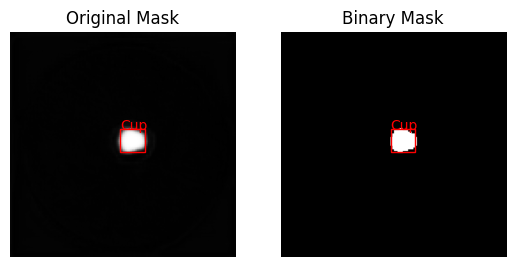

[{'cup_area': 157, 'disc_area': 269, 'acdr': 0.5836431226765799, 'h_cdr': 0.625, 'v_cdr': 0.6086956521739131}, {'d_ymin': 51, 'd_ymax': 73, 'd_xmin': 57, 'd_xmax': 80, 'd_height': 23, 'd_width': 24, 'c_ymin': 55, 'c_ymax': 68, 'c_xmin': 62, 'c_xmax': 76, 'c_height': 14, 'c_width': 15}]


In [11]:
print(utils.calculate_area_CDR(cup_mask_aug[0], disc_mask_aug[0], bcup_mask_aug[0], bdisc_mask_aug[0]))